<a href="https://colab.research.google.com/github/Azmouc1k/azmo-portfolio/blob/main/Spotify_Data_analysis_genre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [ ]:
!pip install spotipy
clear_output()

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [ ]:

client_id = '88d4fa5c377241f3a05528309d58143e'
client_secret = 'fba*************************0c83' # Security

credmanager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=credmanager)

In [ ]:
def artist_features(spotify_search_result):
    result = {
        'artist_name': spotify_search_result.get('name', 'artist_name_not_available'),
        'artist_id': spotify_search_result.get('id', 'artist_id_not_available'),
        'artist_popularity': spotify_search_result.get('popularity', 0),
        'artist_first_genre': (spotify_search_result.get('genres')),
        'artist_n_followers': spotify_search_result.get('followers', {}).get('total', 0)
    }
    return result

In [ ]:
G = nx.Graph()

popularity_threshold = 50

In [ ]:
artists_name_list = ["Bad Bunny", "Doja Cat", "Harry Styles", "Ed Sheeran", "Morgan Wallen", "Taylor Swift", "Justin Bieber", "Drake", "Future", "Lil Baby", "Jack Harlow", "Adele", "Glass Animals", "The Weeknd", "Lil Nas X", "Kodak Black", "Dua Lipa", "Lizzo", "Latto", "Post Malone",
                     "The Kid LAROI", "Beyonce", "Luke Combs", "Lil Durk", "Walker Hayes", "Bailey Zimmerman", "GAYLE", "Steve Lacy", "Kendrick Lamar", "Kate Bush", "SZA", "Kane Brown", "Elton John", "Gunna", "Imagine Dragons", "Karol G", "Cole Swindell", "Olivia Rodrigo", "Em Beihold",
                     "Nicki Minaj", "Cody Johnson", "Zach Bryan", "OneRepublic", "Rod Wave", "Jordan Davis", "Dove Cameron", "Stephanie Beatriz", "Joji", "Jessica Darrow", "J.I.D", "Chencho Corleone", "Juice WRLD", "Charlie Puth", "CKay", "Tems", "Muni Long", "YoungBoy Never Broke Again",
                     "Ariana Grande", "Jason Aldean", "Nardo Wick", "Lauren Spencer-Smith", "Jon Pardi", "Andy Williams", "Summer Walker", "Mariah Carey", "Tyler Hubbard", "Megan Thee Stallion", "Chris Stapleton", "Nicky Youre", "dazy", "Anderson .Paak", "Bruno Mars", "21 Savage", "Brenda Lee",
                     "Camila Cabello", "Sam Hunt", "Thomas Rhett", "Chris Brown", "Parmalee", "Carrie Underwood", "Bobby Helms", "DJ Khaled", "Burl Ives", "Tate McRae", "Maren Morris", "Scotty McCreery", "Young Thug", "Miranda Lambert", "Billie Eilish", "Jelly Roll", "Wizkid", "Sia", "Polo G",
                     "HARDY", "Eric Church", "Yung Gravy", "Parker McCollum", "Luke Bryan", "Rauw Alejandro", "Nate Smith"]

print('There are', len(artists_name_list), 'artists in the initial list.')

There are 100 artists in the initial list.


In [ ]:
import pandas as pd

# search for arisdst
def fetch_artist_data(artist_name):
    search_results = sp.search(q=artist_name, type='artist', limit=1)
    if search_results['artists']['items']:
        artist = search_results['artists']['items'][0]
        return artist_features(artist)
    else:
        print(f"Artist '{artist_name}' not found.")
        return None

artist_data_list = []

# list artists
for artist_name in artists_name_list:
    artist_data = fetch_artist_data(artist_name)
    if artist_data:
        artist_data_list.append(artist_data)

df = pd.DataFrame(artist_data_list)

In [ ]:
print(df)

        artist_name               artist_id  artist_popularity  \
0         Bad Bunny  4q3ewBCX7sLwd24euuV69X                 96   
1          Doja Cat  5cj0lLjcoR7YOSnhnX0Po5                 87   
2      Harry Styles  6KImCVD70vtIoJWnq6nGn3                 85   
3        Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V                 90   
4     Morgan Wallen  4oUHIQIBe0LHzYfvXNW4QM                 90   
..              ...                     ...                ...   
95       Yung Gravy  2YOYua8FpudSEiB9s88IgQ                 68   
96  Parker McCollum  0Z8XVUAOBPM4x12wKnFHEQ                 67   
97       Luke Bryan  0BvkDsjIUla7X0k6CSWh1I                 77   
98   Rauw Alejandro  1mcTU81TzQhprhouKaTkpq                 94   
99       Nate Smith  4NYMUsIcUUsBHbV9DICa5x                 73   

                                   artist_first_genre  artist_n_followers  
0             [reggaeton, trap latino, urbano latino]            87991957  
1                                    [dance pop, pop]  

Descriptive Statistics for Numeric Columns:
       artist_popularity  artist_n_followers
count         100.000000        1.000000e+02
mean           79.990000        1.943007e+07
std            10.994484        2.878869e+07
min            28.000000        6.250000e+03
25%            73.000000        1.562659e+06
50%            81.500000        6.675576e+06
75%            88.000000        2.468146e+07
max           100.000000        1.286263e+08

Correlation Matrix (Numeric Columns):
                    artist_popularity  artist_n_followers
artist_popularity            1.000000            0.644828
artist_n_followers           0.644828            1.000000


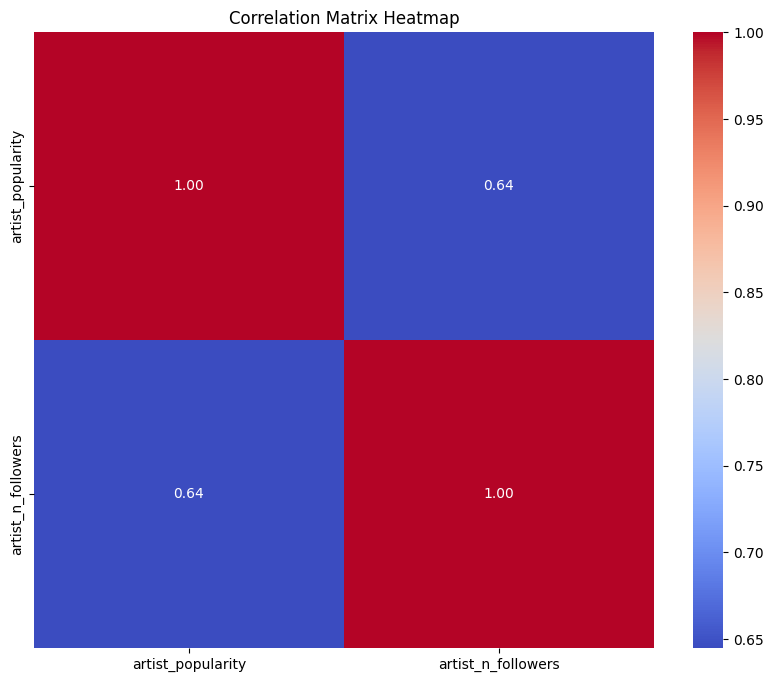

In [ ]:

# for numeric
numeric_df = df.select_dtypes(include=['number'])
print("Descriptive Statistics for Numeric Columns:")
print(numeric_df.describe())

print("\nCorrelation Matrix (Numeric Columns):")
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


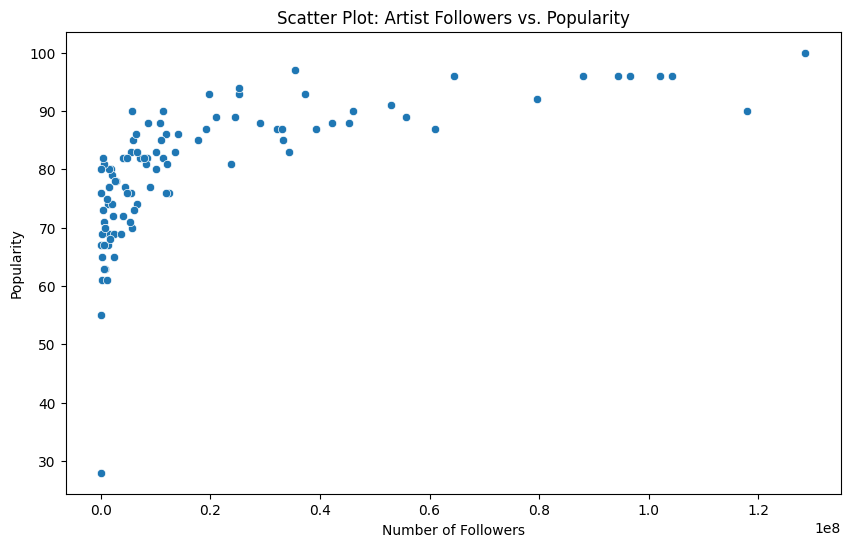

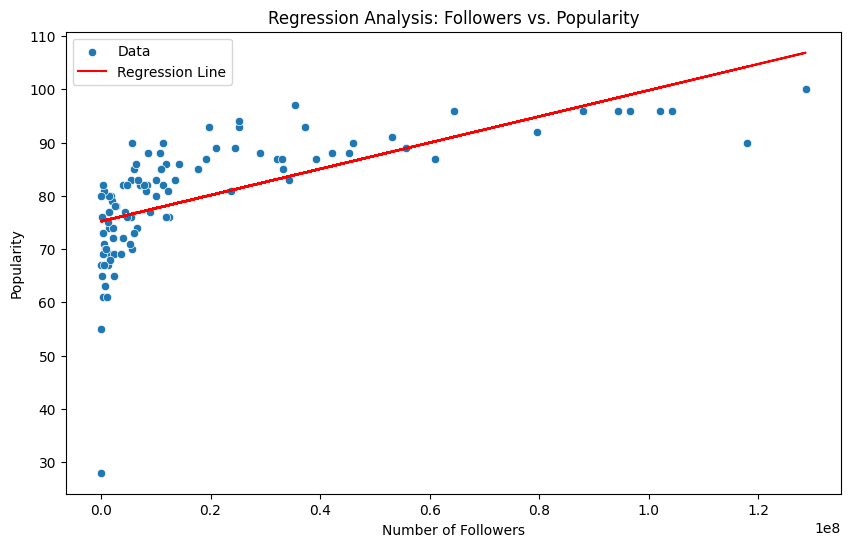

Regression Coefficient (Slope): 0.00
Intercept: 75.21
R-squared: 0.42

Outliers Detected:
       artist_name               artist_id  artist_popularity  \
48  Jessica Darrow  4vdAAzZBUKbsrvHi6UR7B7                 55   
69            Dazy  2pe1uLYghU4lj6Fe6qq8k6                 28   

   artist_first_genre  artist_n_followers  
48      [movie tunes]               28820  
69      [countrygaze]                6250  

Average Number of Followers per Popularity Segment:
popularity_segment
Low         6.250000e+03
Moderate    2.882000e+04
High        1.177550e+07
Top         6.813068e+07
Name: artist_n_followers, dtype: float64


<ipython-input-10-5989a475e473>:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = df.groupby('popularity_segment')['artist_n_followers'].mean()


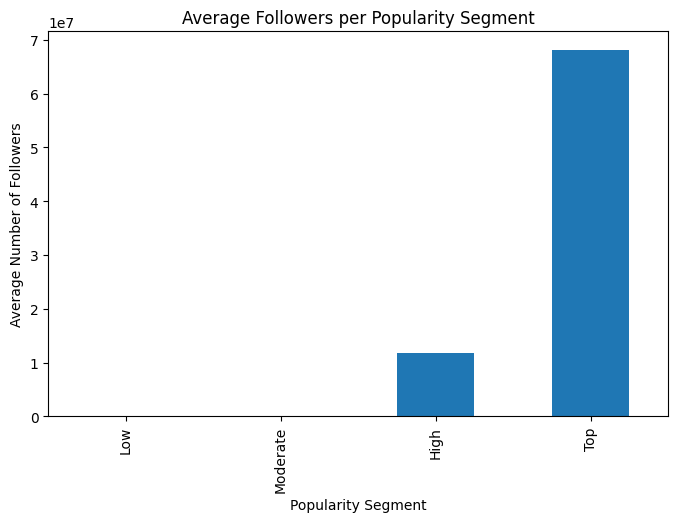

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np


plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['artist_n_followers'], y=df['artist_popularity'])
plt.title("Scatter Plot: Artist Followers vs. Popularity")
plt.xlabel("Number of Followers")
plt.ylabel("Popularity")
plt.show()


X = df[['artist_n_followers']].values
y = df['artist_popularity'].values


model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['artist_n_followers'], y=df['artist_popularity'], label="Data")
plt.plot(df['artist_n_followers'], y_pred, color='red', label="Regression Line")
plt.title("Regression Analysis: Followers vs. Popularity")
plt.xlabel("Number of Followers")
plt.ylabel("Popularity")
plt.legend()
plt.show()


print(f"Regression Coefficient (Slope): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R-squared: {model.score(X, y):.2f}")

residuals = y - y_pred
outlier_threshold = np.std(residuals) * 2
outliers = df[np.abs(residuals) > outlier_threshold]
print("\nOutliers Detected:")
print(outliers)


bins = [0, 30, 60, 90, 100]
labels = ['Low', 'Moderate', 'High', 'Top']
df['popularity_segment'] = pd.cut(df['artist_popularity'], bins=bins, labels=labels)


segment_analysis = df.groupby('popularity_segment')['artist_n_followers'].mean()
print("\nAverage Number of Followers per Popularity Segment:")
print(segment_analysis)


segment_analysis.plot(kind='bar', figsize=(8, 5), title="Average Followers per Popularity Segment")
plt.ylabel("Average Number of Followers")
plt.xlabel("Popularity Segment")
plt.show()


In [ ]:
df['artist_n_followers'] = df['artist_n_followers'].astype(float)
df['artist_n_followers'] = df['artist_n_followers'].astype(int)
print(df['artist_n_followers'].head())


0     87991957
1     32208307
2     33263452
3    117972532
4     11380518
Name: artist_n_followers, dtype: int64


In [ ]:
for name in artists_name_list:
    search = sp.search(name, type='artist')['artists']['items'][0]
    this_artist = artist_features(search)

    if this_artist['artist_popularity'] >= popularity_threshold:
        G.add_node(this_artist['artist_name'], **this_artist, related_found=False)
    else:
        print(name, 'is not a popular artist, we do not add it to our graph.')

dazy is not a popular artist, we do not add it to our graph.


In [ ]:
dummy = 0

while dummy == 0:
    l = len(G) # number of nodes in the graph currently

    for x in list(G): # iterate each node
        if G.nodes[x]['related_found'] == False: # then we need to find its related artists
            relateds = sp.artist_related_artists(G.nodes[x]['artist_id'])['artists']
            relateds = [artist_features(r) for r in relateds]
            relateds_names = [r['artist_name'] for r in relateds]
            G.nodes[x]['related_found'] = True # it was False, but now we found its related artists

            for rname, rdict in zip(relateds_names, relateds):
                if rdict['artist_popularity'] >= popularity_threshold:

                    if rname in G: # node already in G
                        pass # do nothing

                    else:
                        G.add_node(rname, **rdict, related_found=False) # we added a new node, we don't know its relateds yet
                        clear_output(wait=True)
                        print('The graph has', len(G), 'nodes now.')

                    G.add_edge(x, rname) # we add an edge between x and its related rname

    if len(G) == l or len(G) > 1000: # number of nodes didn't change or graph grew too large
        dummy = 1 # break the while loop
        print('Done.')

The graph has 1006 nodes now.
Done.


In [ ]:
n_connected = nx.number_connected_components(G)
print('The graph has', n_connected, 'connected components.')

The graph has 10 connected components.


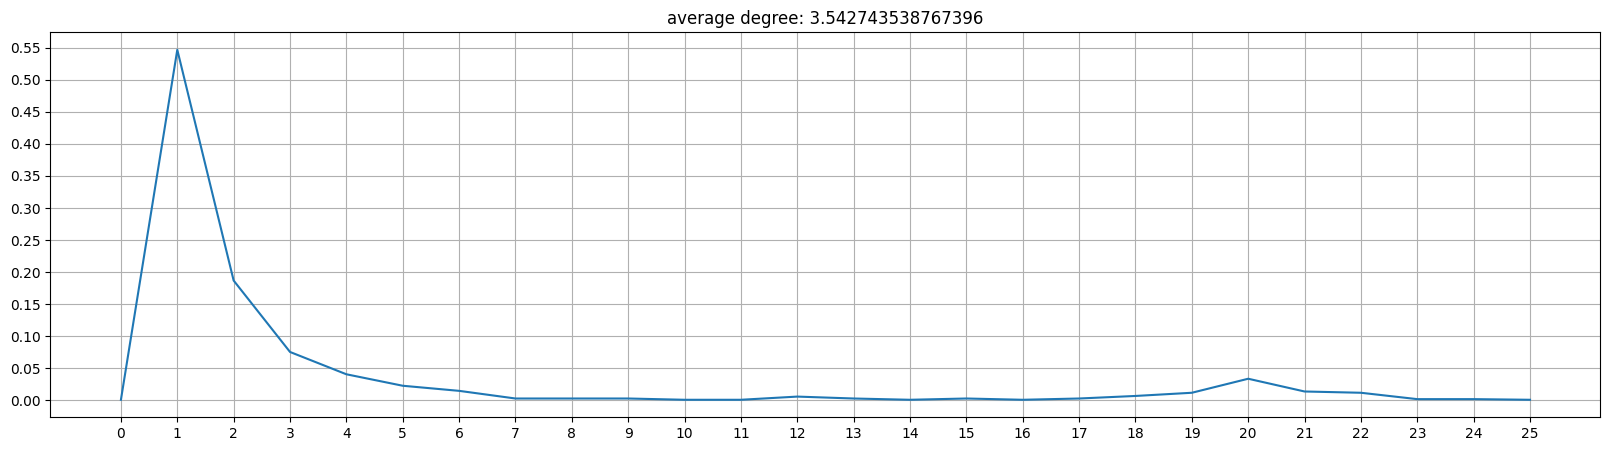

In [ ]:
plt.figure(figsize=(20,5))
degree_hist = nx.degree_histogram(G)
degree_prob = [degree/G.number_of_nodes() for degree in degree_hist]
plt.plot(degree_prob)
plt.xticks(np.arange(0,len(degree_prob)))
plt.yticks(np.arange(0, max(degree_prob)+0.01, 0.05))
plt.grid()
G_deg_sum = [a * b for a, b in zip(degree_hist, range(0, len(degree_hist)))]
plt.title('average degree: {}'.format(sum(G_deg_sum) / G.number_of_nodes()))
plt.show()


<ipython-input-12-637dcf176833>:6: RuntimeWarning: overflow encountered in power
  return a * np.power(x, -b)


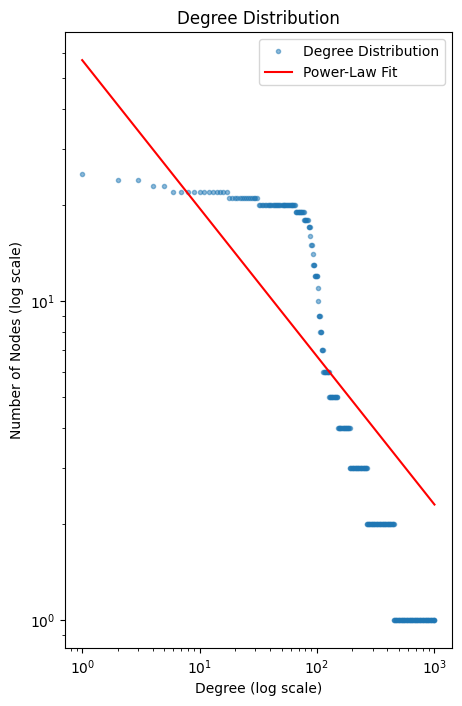

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

# define power-law function
def powerlaw(x, a, b):
    return a * np.power(x, -b)

# create degree sequence
degree_seq = sorted([d for n, d in G.degree()], reverse=True)

# fit power-law distribution
popt, pcov = curve_fit(powerlaw, range(1, len(degree_seq)+1), degree_seq)

# plot degree distribution and power-law fit
plt.figure(figsize=(5,8))
plt.loglog(range(1, len(degree_seq)+1), degree_seq,  'o',alpha = 0.5, markersize = 3, markevery=0.001,  label='Degree Distribution')
plt.loglog(range(1, len(degree_seq)+1), powerlaw(range(1, len(degree_seq)+1), *popt), 'r-', label='Power-Law Fit')
plt.legend()
plt.title('Degree Distribution')
plt.xlabel('Degree (log scale)')
plt.ylabel('Number of Nodes (log scale)')
plt.show()


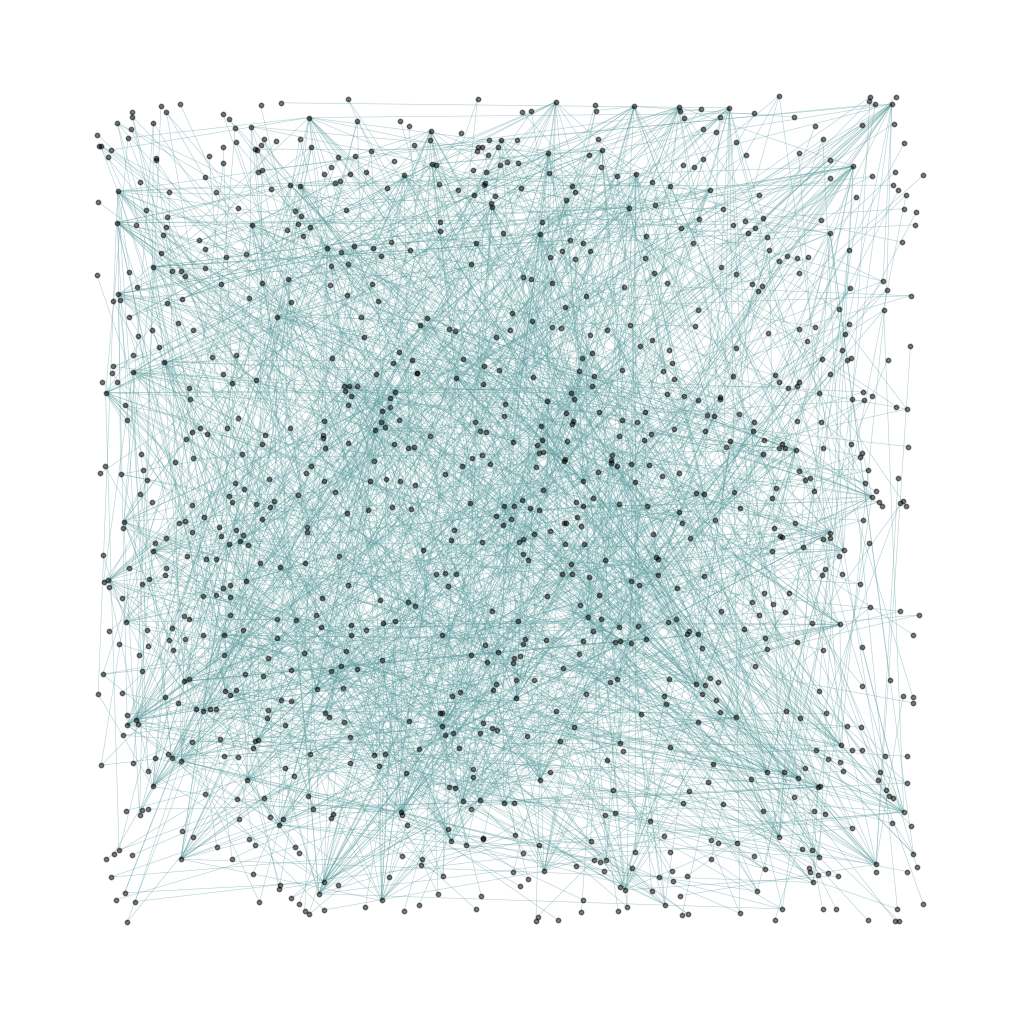

In [ ]:
plt.figure(figsize=(10,10))
nx.draw(G, pos=nx.random_layout(G), with_labels=False,node_size = 10, alpha = 0.5, width = 0.4, edge_color = 'cadetblue', node_color= 'black', font_size=5)

In [ ]:
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]

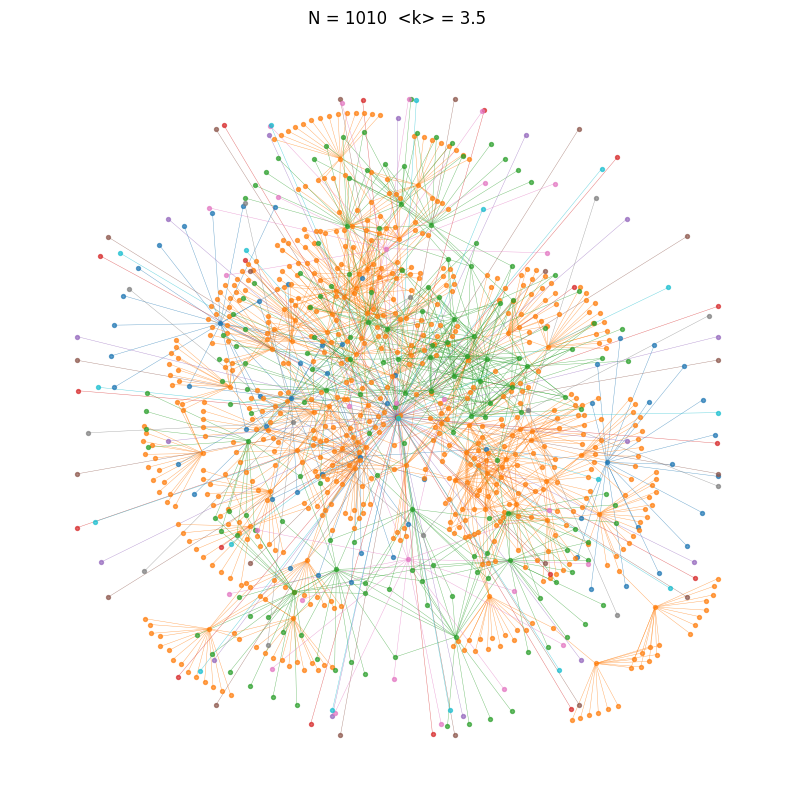

In [ ]:

plt.figure(figsize=(10,10))
ax = plt.gca()
ax.set_title('N = 1010  <k> = 3.5')
nx.draw_kamada_kawai(S[0], with_labels=False,node_size = 8, alpha = 0.7, width = 0.3, edge_color = '#1f77b4', node_color= '#1f77b4', font_size=5)
nx.draw_kamada_kawai(S[1], with_labels=False,node_size = 8,alpha = 0.7, width = 0.3, edge_color = '#ff7f0e', node_color= '#ff7f0e', font_size=5)
nx.draw_kamada_kawai(S[2], with_labels=False,node_size = 8,alpha = 0.7, width = 0.3, edge_color = '#2ca02c', node_color= '#2ca02c', font_size=5)
nx.draw_kamada_kawai(S[3], with_labels=False,node_size = 8,alpha = 0.7, width = 0.3, edge_color = '#d62728', node_color= '#d62728', font_size=5)
nx.draw_kamada_kawai(S[4], with_labels=False,node_size = 8,alpha = 0.7, width = 0.3, edge_color = '#9467bd', node_color= '#9467bd', font_size=5)
nx.draw_kamada_kawai(S[5], with_labels=False,node_size = 8,alpha = 0.7, width = 0.3, edge_color = '#8c564b', node_color= '#8c564b', font_size=5)
nx.draw_kamada_kawai(S[6], with_labels=False,node_size = 8, alpha = 0.7, width = 0.3, edge_color = '#e377c2', node_color= '#e377c2', font_size=5)
nx.draw_kamada_kawai(S[7], with_labels=False,node_size = 8,alpha = 0.7, width = 0.3, edge_color = '#7f7f7f', node_color= '#7f7f7f', font_size=5)
nx.draw_kamada_kawai(S[8], with_labels=False,node_size = 8,alpha = 0.7, width = 0.3, edge_color = '#bcbd22', node_color= '#bcbd22', font_size=5)
nx.draw_kamada_kawai(S[9], with_labels=False,node_size = 8,alpha = 0.7, width = 0.3, edge_color = '#17becf', node_color= '#17becf', font_size=5)

In [ ]:
tl = []
for i in S:
  a = len(i)
  a = str(a)
  tl.append(a)
  a = int(a)
  a = 0

In [ ]:
tl

['58', '663', '170', '19', '16', '21', '27', '13', '1', '18']

In [ ]:
k = []
for i in S:
  S_deg = nx.degree_histogram(i)
  S_deg_sum = [a * b for a, b in zip(S_deg, range(0, len(S_deg)))]
  a = ('{}'.format(sum(S_deg_sum) / i.number_of_nodes()))
  k.append(a)
  a = ''

In [ ]:
k

['2.7241379310344827',
 '3.420814479638009',
 '5.376470588235295',
 '1.894736842105263',
 '1.875',
 '1.9047619047619047',
 '2.074074074074074',
 '2.1538461538461537',
 '0.0',
 '1.8888888888888888']

In [ ]:
cl = [    "tab:blue",    "tab:orange",    "tab:green",    "tab:red",    "tab:purple",    "tab:brown",    "tab:pink",    "tab:gray",    "tab:olive",    "tab:cyan",    "deepskyblue",    "mediumblue",    "midnightblue",    "navy",    "royalblue",    "cornflowerblue",    "steelblue",
      "slateblue",    "darkslateblue",    "turquoise",    "cadetblue",    "teal",    "mediumturquoise",    "lightseagreen",    "mediumaquamarine",    "forestgreen",    "olivedrab",    "darkolivegreen",    "seagreen",    "limegreen",    "springgreen",    "palegreen",    "greenyellow",
      "chartreuse",    "darkkhaki",    "khaki",    "yellow",    "gold",    "darkgoldenrod",    "rosybrown",    "saddlebrown",    "sienna",    "chocolate",    "peru",    "darkorange",    "orangered",    "tomato",    "coral",    "indianred",    "firebrick",    "maroon",    "crimson",
      "darkred",    "mediumvioletred",    "deeppink",    "hotpink"]

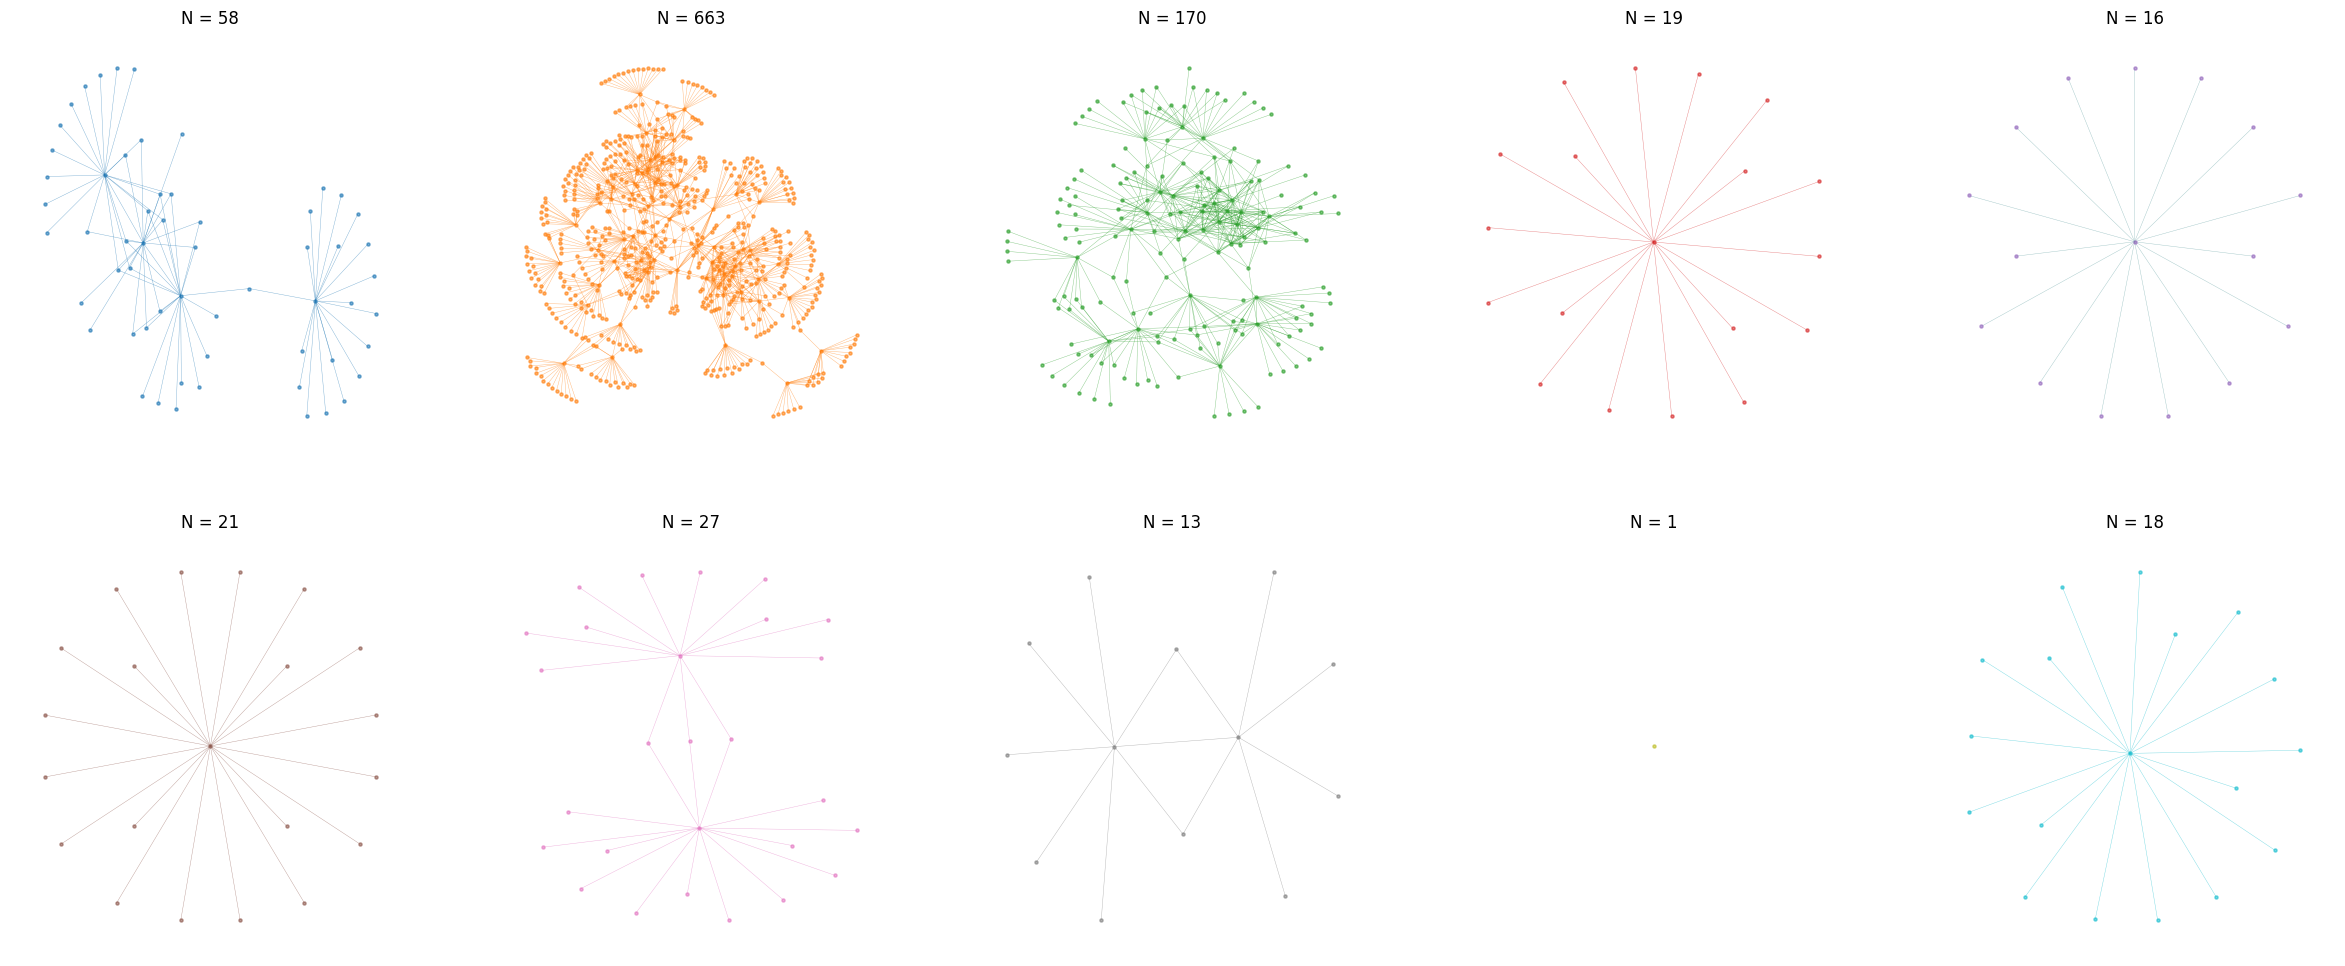

In [ ]:
# GENRE CONNECTED ONLY NETWORKS EACH PLOT

plt.figure(figsize = (30, 12))
plt.subplot(2, 5, 1)
plt.title('N = ' + tl[0])
nx.draw_kamada_kawai(S[0], with_labels=False,node_size = 5,alpha = 0.6, width = 0.3, edge_color = cl[0], node_color= cl[0], font_size=5)
plt.subplot(2,5,2)
plt.title('N = ' + tl[1])
nx.draw_kamada_kawai(S[1], with_labels=False,node_size = 5,alpha = 0.6, width = 0.3, edge_color = cl[1], node_color= cl[1], font_size=5)
plt.subplot(2,5,3)
plt.title('N = ' + tl[2])
nx.draw_kamada_kawai(S[2], with_labels=False,node_size = 5,alpha = 0.6, width = 0.3, edge_color = cl[2], node_color=cl[2], font_size=5)
plt.subplot(2,5,4)
plt.title('N = ' + tl[3])
nx.draw_kamada_kawai(S[3], with_labels=False,node_size = 5,alpha = 0.6, width = 0.3, edge_color = cl[3], node_color= cl[3], font_size=5)
plt.subplot(2,5,5)
plt.title('N = ' + tl[4])
nx.draw_kamada_kawai(S[4], with_labels=False,node_size = 5,alpha = 0.6, width = 0.3, edge_color = cl[20], node_color= cl[4], font_size=5)
plt.subplot(2,5,6)
plt.title('N = ' + tl[5])
nx.draw_kamada_kawai(S[5], with_labels=False,node_size = 5,alpha = 0.6, width = 0.3, edge_color = cl[5], node_color= cl[5], font_size=5)
plt.subplot(2,5,7)
plt.title('N = ' + tl[6])
nx.draw_kamada_kawai(S[6], with_labels=False,node_size = 5,alpha = 0.6, width = 0.3, edge_color = cl[6], node_color= cl[6], font_size=5)
plt.subplot(2,5,8)
plt.title('N = ' + tl[7])
nx.draw_kamada_kawai(S[7], with_labels=False,node_size = 5,alpha = 0.6, width = 0.3, edge_color = cl[7], node_color= cl[7], font_size=5)
plt.subplot(2,5,9)
plt.title('N = ' + tl[8])
nx.draw_kamada_kawai(S[8], with_labels=False,node_size = 5,alpha = 0.6, width = 0.3, edge_color = cl[8], node_color= cl[8], font_size=5)
plt.subplot(2,5,10)
plt.title('N = ' + tl[9])
nx.draw_kamada_kawai(S[9], with_labels=False,node_size = 5,alpha = 0.6, width = 0.3, edge_color = cl[9], node_color= cl[9], font_size=5)


In [ ]:
search = sp.search('Bad Bunny', type='artist')['artists']['items'][0]
this_artist = artist_features(search)

print(this_artist['artist_first_genre'][0])

reggaeton


In [ ]:
attr = []
for i in G:
    search = sp.search(i, type='artist')['artists']['items'][0]
    this_artist = artist_features(search)
    if len(this_artist['artist_first_genre']) != 0:
      attr.append(this_artist['artist_first_genre'][0])
    else:
      attr.append('NA')

In [ ]:
for i in range(len(attr)):
    if attr[i].find('pop') != -1:
        attr[i] = 'pop'
    if attr[i].find('rap') != -1:
        attr[i] = 'rap'
    if attr[i].find('hip hop') != -1:
        attr[i] = 'hip hop'
    if attr[i].find('country') != -1:
        attr[i] = 'country'
    if attr[i].find('reggaeton') != -1:
        attr[i] = 'reggaeton'
    if attr[i].find('edm') != -1:
        attr[i] = 'edm'
    if attr[i].find('soul') != -1:
        attr[i] = 'soul'
    if attr[i].find('r&b') != -1:
        attr[i] = 'r&b'
    if attr[i].find('drill') != -1:
        attr[i] = 'drill'
    if attr[i].find('rock') != -1:
        attr[i] = 'rock'
    if attr[i].find('trap') != -1:
        attr[i] = 'trap'
    if attr[i].find('dance') != -1:
        attr[i] = 'dance'
    if attr[i].find('indie') != -1:
        attr[i] = 'indie'

In [ ]:
dic = {}
for k, v in zip(G, attr):
  dic[k] = v


In [ ]:
nx.set_node_attributes(G, dic, 'attr')

In [ ]:
col = []
for i in attr:
  if i not in col:
    col.append(i)

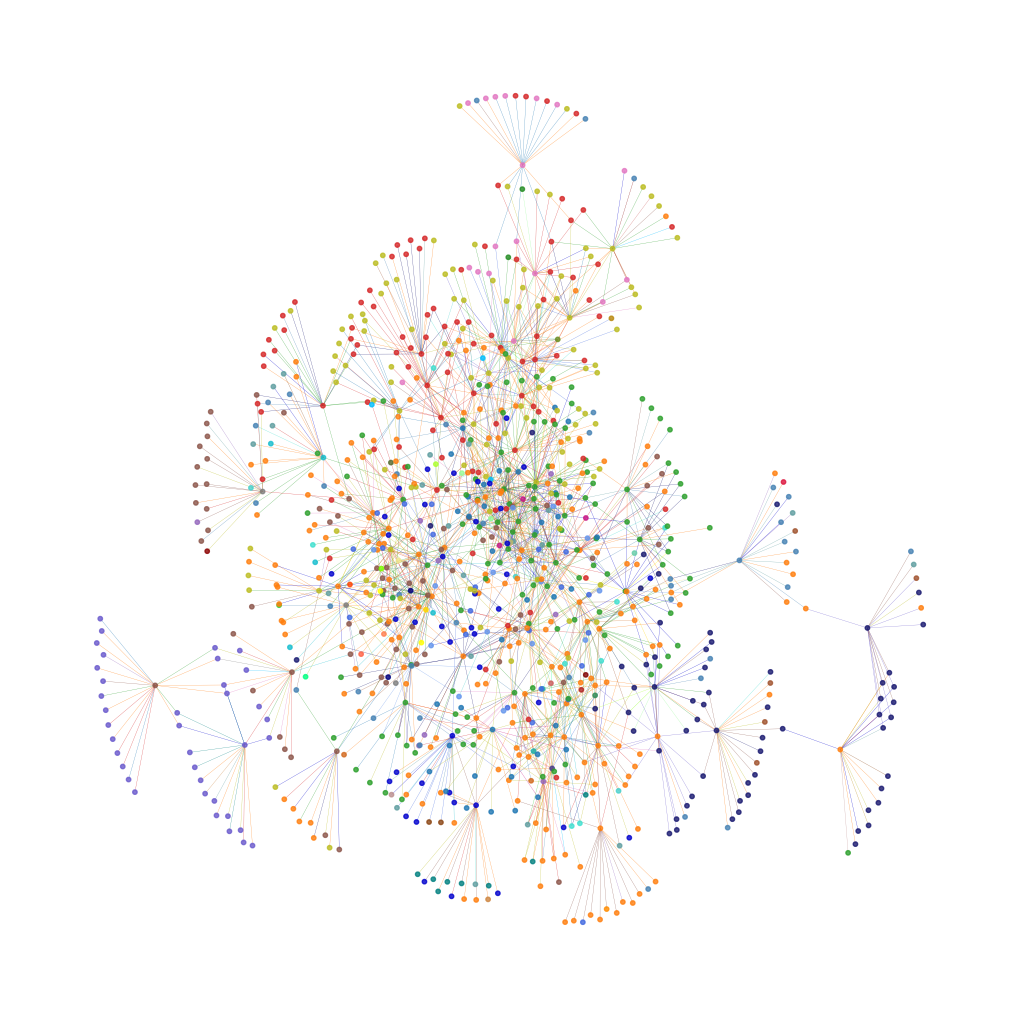

In [ ]:
colormap = []
cl = [    "tab:blue",    "tab:orange",    "tab:green",    "tab:red",    "tab:purple",    "tab:brown",    "tab:pink",    "tab:gray",    "tab:olive",    "tab:cyan",    "deepskyblue",    "mediumblue",    "midnightblue",    "navy",    "royalblue",    "cornflowerblue",    "steelblue",
      "slateblue",    "darkslateblue",    "turquoise",    "cadetblue",    "teal",    "mediumturquoise",    "lightseagreen",    "mediumaquamarine",    "forestgreen",    "olivedrab",    "darkolivegreen",    "seagreen",    "limegreen",    "springgreen",    "palegreen",    "greenyellow",
      "chartreuse",    "darkkhaki",    "khaki",    "yellow",    "gold",    "darkgoldenrod",    "rosybrown",    "saddlebrown",    "sienna",    "chocolate",    "peru",    "darkorange",    "orangered",    "tomato",    "coral",    "indianred",    "firebrick",    "maroon",    "crimson",
      "darkred",    "mediumvioletred",    "deeppink",    "hotpink"]
for node in G:
  for k, i in enumerate(col):
    if G.nodes[node]['attr'] == i:
        colormap.append(cl[k])

plt.figure(figsize = (10,10))
nx.draw_kamada_kawai(G, alpha = 0.8, node_color=colormap, edge_color = colormap, node_size = 10, width = 0.2, with_labels=False)
plt.show()



In [ ]:
D = [G.subgraph(c).copy() for c in nx.connected_components(G)]

In [ ]:
len(D)

10

In [ ]:
ts = []
for i in D:
  a = len(i)
  a = str(a)
  ts.append(a)
  a = int(a)
  a = 0

In [ ]:
colors = []

In [ ]:
col

['reggaeton',
 'pop',
 'country',
 'hip hop',
 'soul',
 'r&b',
 'drill',
 'escape room',
 'rap',
 'afrofuturism',
 'black americana',
 'rock',
 'alt z',
 'hollywood',
 'movie tunes',
 'adult standards',
 'NA',
 'afrobeats',
 'dance',
 'boy band',
 'indie',
 'neo mellow',
 'edm',
 'girl group',
 'complextro',
 'chicago bop',
 'pluggnb',
 'brostep',
 'hel',
 'strut',
 'diva house',
 'lilith',
 'art punk',
 'melancholia',
 'experimental',
 'beatlesque',
 'mellow gold',
 'british folk',
 'plugg',
 'speedrun',
 'bossbeat',
 'gen z singer-songwriter',
 'red dirt',
 'alternative metal',
 'otacore',
 'soundtrack',
 'broadway',
 'canadian soundtrack',
 'canadian americana',
 'alternative americana',
 'new americana',
 'ccm',
 'abstract beats',
 'redneck']

In [ ]:
len(G)

1006

In [ ]:
for i in D[1]:
  print(i)

Doja Cat
Harry Styles
Ed Sheeran
Taylor Swift
Justin Bieber
Drake
Future
Lil Baby
Jack Harlow
Adele
The Weeknd
Lil Nas X
Kodak Black
Dua Lipa
Lizzo
Latto
Post Malone
The Kid LAROI
Beyoncé
Lil Durk
GAYLE
Steve Lacy
Kendrick Lamar
SZA
Gunna
Imagine Dragons
Olivia Rodrigo
Em Beihold
Nicki Minaj
OneRepublic
Rod Wave
Dove Cameron
Joji
JID
Juice WRLD
Charlie Puth
CKay
Tems
Muni Long
YoungBoy Never Broke Again
Ariana Grande
Nardo Wick
Lauren Spencer Smith
Summer Walker
Mariah Carey
Megan Thee Stallion
Nicky Youre
Anderson .Paak
Bruno Mars
21 Savage
Camila Cabello
Chris Brown
DJ Khaled
Tate McRae
Young Thug
Billie Eilish
Wizkid
Sia
Polo G
Yung Gravy
Kali Uchis
Kehlani
Alina Baraz
Chloe x Halle
Kiana Ledé
Jorja Smith
Jessie Reyez
Rina Sawayama
Justine Skye
Tinashe
Qveen Herby
H.E.R.
Sabrina Claudio
Baby Tate
Ashnikko
Victoria Monét
Rico Nasty
Ella Mai
BIA
Niall Horan
Louis Tomlinson
Liam Payne
5 Seconds of Summer
Alessia Cara
Phoebe Bridgers
One Direction
Hailee Steinfeld
The 1975
The Vamps
Ash

<function matplotlib.pyplot.show(close=None, block=None)>

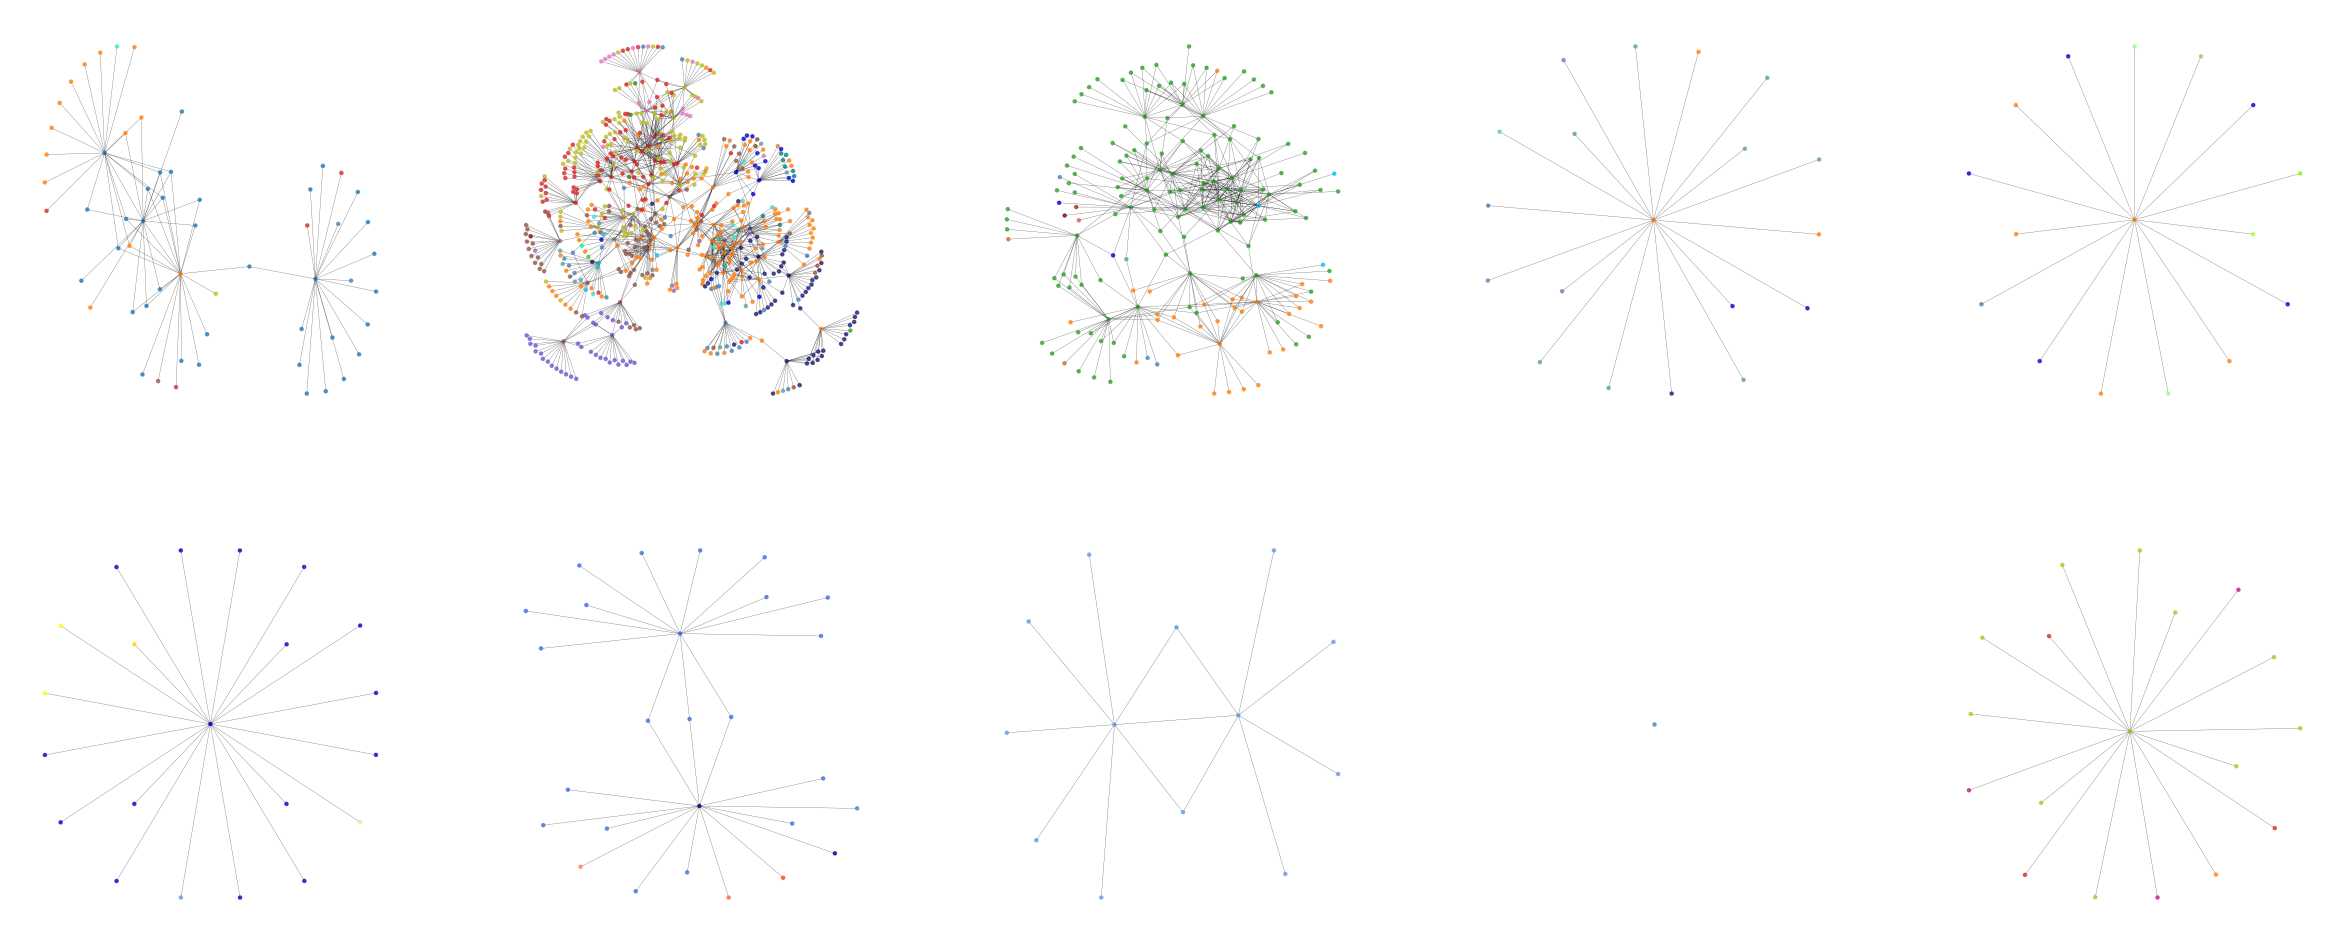

In [ ]:

plt.figure(figsize = (30,12))
for l, q in enumerate(D):
  colors = []
  for node in q:
    for k, i in enumerate(col):
      if q.nodes[node]['attr'] == i:
          colors.append(cl[k])
  plt.subplot(2,5,l+1)
  nx.draw_kamada_kawai(q, alpha = 0.7, node_color=colors, edge_color = 'black', node_size = 5, width = 0.2, with_labels=False)
plt.show

In [ ]:
import matplotlib.patches as mpatches

In [ ]:
colors_dict = {'tab:blue': 'reggaeton',
 'tab:orange': 'pop',
 'turquoise': 'boy band',
 'tab:red': 'hip hop',
 'steelblue': 'NA',
 'tab:olive': 'rap',
 'tab:purple': 'soul',
 'tab:brown': 'r&b',
 'tab:pink': 'drill',
 'tab:gray': 'escape room',
 'tab:cyan': 'afrofuturism',
 'mediumblue': 'rock',
 'midnightblue': 'alt z',
 'slateblue': 'afrobeats',
 'darkslateblue': 'dance',
 'cadetblue': 'indie',
 'teal': 'neo mellow',
 'mediumturquoise': 'edm',
 'lightseagreen': 'girl group',
 'mediumaquamarine': 'complextro',
 'forestgreen': 'chicago bop',
 'olivedrab': 'pluggnb',
 'darkolivegreen': 'brostep',
 'seagreen': 'hel',
 'limegreen': 'strut',
 'springgreen': 'diva house',
 'tab:green': 'country',
 'darkgoldenrod': 'plugg',
 'rosybrown': 'speedrun',
 'saddlebrown': 'bossbeat',
 'sienna': 'gen z singer-songwriter',
 'peru': 'alternative metal',
 'royalblue': 'movie tunes',
 'darkorange': 'otacore',
 'crimson': 'ccm',
 'darkred': 'abstract beats',
 'deepskyblue': 'black americana',
 'maroon': 'new americana',
 'chocolate': 'red dirt',
 'firebrick': 'alternative americana',
 'indianred': 'canadian americana',
 'palegreen': 'lilith',
 'darkkhaki': 'experimental',
 'chartreuse': 'melancholia',
 'greenyellow': 'art punk',
 'yellow': 'mellow gold',
 'khaki': 'beatlesque',
 'cornflowerblue': 'adult standards',
 'gold': 'british folk',
 'coral': 'canadian soundtrack',
 'orangered': 'soundtrack',
 'navy': 'hollywood',
 'tomato': 'broadway',
 'mediumvioletred': 'redneck'}

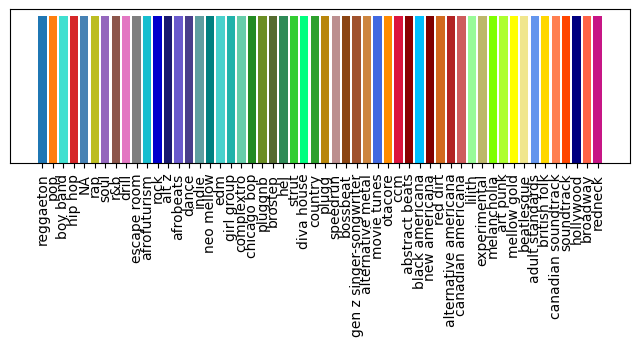

In [ ]:
names = list(colors_dict.values())
colors = list(colors_dict.keys())

plt.figure(figsize=(8, 2))
for i, c in enumerate(colors):
    plt.bar(i, 1, color=c)

plt.xticks(range(len(names)), names, rotation=90)
plt.yticks([])
plt.show()

In [ ]:
for k, i in enumerate(D):
  num_nodes = i.number_of_nodes()
  print('Number of nodes G['+str(k+1)+'](N): =', num_nodes)

Number of nodes G[1](N): = 58
Number of nodes G[2](N): = 663
Number of nodes G[3](N): = 170
Number of nodes G[4](N): = 19
Number of nodes G[5](N): = 16
Number of nodes G[6](N): = 21
Number of nodes G[7](N): = 27
Number of nodes G[8](N): = 13
Number of nodes G[9](N): = 1
Number of nodes G[10](N): = 18


In [ ]:
num_nodes = G.number_of_nodes()
print('Number of nodes N: =', num_nodes)

Number of nodes N: = 1006


In [ ]:
for i, l in enumerate(D):
  L = l.number_of_edges()
  print("Number of links: G["+str(i+1)+"]L =", L)

Number of links: G[1]L = 79
Number of links: G[2]L = 1134
Number of links: G[3]L = 457
Number of links: G[4]L = 18
Number of links: G[5]L = 15
Number of links: G[6]L = 20
Number of links: G[7]L = 28
Number of links: G[8]L = 14
Number of links: G[9]L = 0
Number of links: G[10]L = 17


In [ ]:
L = G.number_of_edges()
print("Number of links in the graph: L =", L)

Number of links in the graph: L = 1782
